In [1]:
# Importing numpy, pandas, and matplotlib
# numpy is used for the matrix algebra, pandas is used to feed in the data, 
# and matplotlib is used to plot the results
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('train.csv')

In [4]:
# Converting the data into a matrix, i.e. a numpy array
data = np.array(data)
# Storing the dimensions of the data as m and n
m, n = data.shape
# Shuffling the data
np.random.shuffle(data)

# Setting aside 1000 datapoints to use to test final performance
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

# Setting aside the rest of the datapoints to train the network
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
# Initializing the weights and biases to random values for the first iteration
def init_params():
    W1 = np.random.rand(16, 784) - 0.5
    b1 = np.random.rand(16, 1) - 0.5
    W2 = np.random.rand(10, 16) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# The ReLU activation function
def ReLU(Z):
    return np.maximum(Z, 0)

# The softmax activation function
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# Forward propagation
def forward_propagation(W1, b1, W2, b2, X):
    # First layer
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    # Second layer
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# The derivative of the ReLU function
def ReLU_deriv(Z):
    return Z > 0

# One-hot encoding the correct labels
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Backward propagation
def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    # Second layer
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    # First layer
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# Updating parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # First layer
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1 
    # Second layer
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [6]:
# Getting some predictions the network made for testing
def get_predictions(A2):
    return np.argmax(A2, 0)

# Returns how accurate the predictions of the network were
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Training the network
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 10 == 0):
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1001, 0.1)

Iteration:  0
[7 9 9 ... 9 0 9] [5 6 9 ... 0 5 5]
Accuracy:  0.09478048780487805
Iteration:  10
[7 9 9 ... 4 0 3] [5 6 9 ... 0 5 5]
Accuracy:  0.19217073170731708
Iteration:  20
[7 0 9 ... 2 0 3] [5 6 9 ... 0 5 5]
Accuracy:  0.29385365853658535
Iteration:  30
[1 0 4 ... 2 0 1] [5 6 9 ... 0 5 5]
Accuracy:  0.3854390243902439
Iteration:  40
[1 9 9 ... 6 0 1] [5 6 9 ... 0 5 5]
Accuracy:  0.4511951219512195
Iteration:  50
[1 9 9 ... 6 0 1] [5 6 9 ... 0 5 5]
Accuracy:  0.4954390243902439
Iteration:  60
[5 0 9 ... 6 0 1] [5 6 9 ... 0 5 5]
Accuracy:  0.5341463414634147
Iteration:  70
[5 0 9 ... 6 0 1] [5 6 9 ... 0 5 5]
Accuracy:  0.5686341463414634
Iteration:  80
[5 0 9 ... 6 0 1] [5 6 9 ... 0 5 5]
Accuracy:  0.5988536585365853
Iteration:  90
[5 0 9 ... 6 0 1] [5 6 9 ... 0 5 5]
Accuracy:  0.6251219512195122
Iteration:  100
[5 0 9 ... 6 0 1] [5 6 9 ... 0 5 5]
Accuracy:  0.648390243902439
Iteration:  110
[5 0 9 ... 6 0 1] [5 6 9 ... 0 5 5]
Accuracy:  0.6682926829268293
Iteration:  120
[5 0 9 ..

In [8]:
# Making predictions about image labels using forward propagations of the network
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

# Testing predictions made using the network and plotting them
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


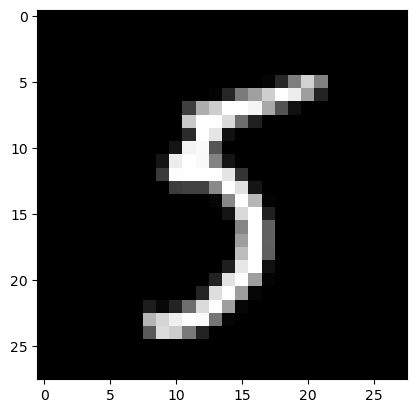

Prediction:  [6]
Label:  6


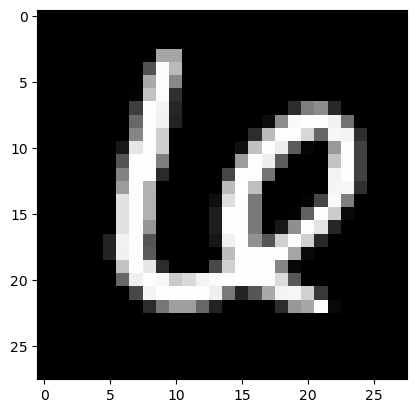

Prediction:  [9]
Label:  9


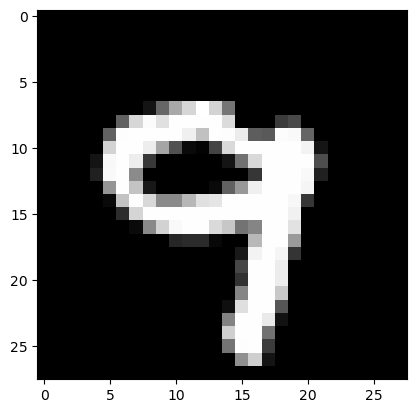

Prediction:  [7]
Label:  7


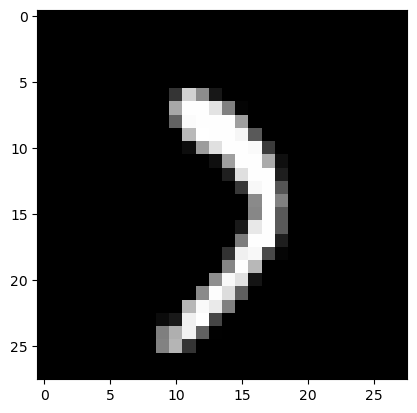

In [9]:
# Testing some sample predictions
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)